# Experiment 7

## How k-medoids overcomes the drawbacks of k-means algorithm?

 K-medioids is more robust to outliers than k-means, as it is considering more of a median-type approach to measuring the data.

## Code and output

#### Load the libraries

In [1]:
library(factoextra)
library(cluster)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'cluster' was built under R version 3.6.3"

#### Start with the analysis

In [2]:
data <- USArrests
data <- na.omit(data)
data <- scale(data)
head(data)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


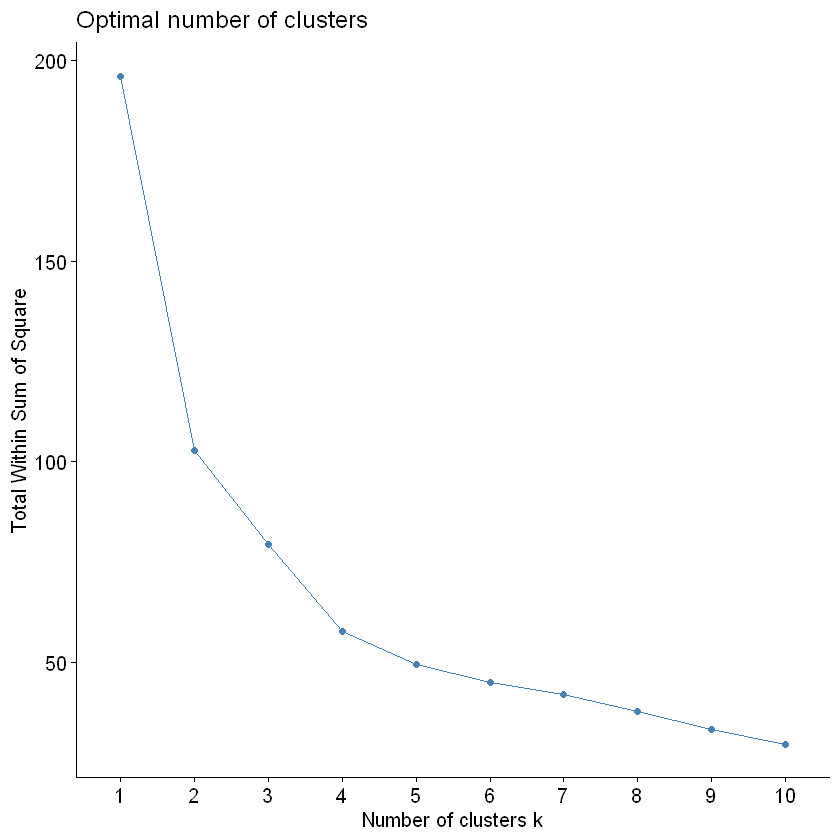

In [4]:
# First we will check for the number of clusters required using the method used in K-Means
fviz_nbclust(data, pam, method = "wss")

In [6]:
# The bend appears at 4 clusters so optimal number of clusters is 4
# Now we calculate K Medians
kmed <- pam(data, k = 4)
kmed

Medoids:
              ID     Murder    Assault   UrbanPop         Rape
Alabama        1  1.2425641  0.7828393 -0.5209066 -0.003416473
Michigan      22  0.9900104  1.0108275  0.5844655  1.480613993
Oklahoma      36 -0.2727580 -0.2371077  0.1699510 -0.131534211
New Hampshire 29 -1.3059321 -1.3650491 -0.6590781 -1.252564419
Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              4              2              3              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              4              2 
 Massachusetts       Michigan      Minnesota    M

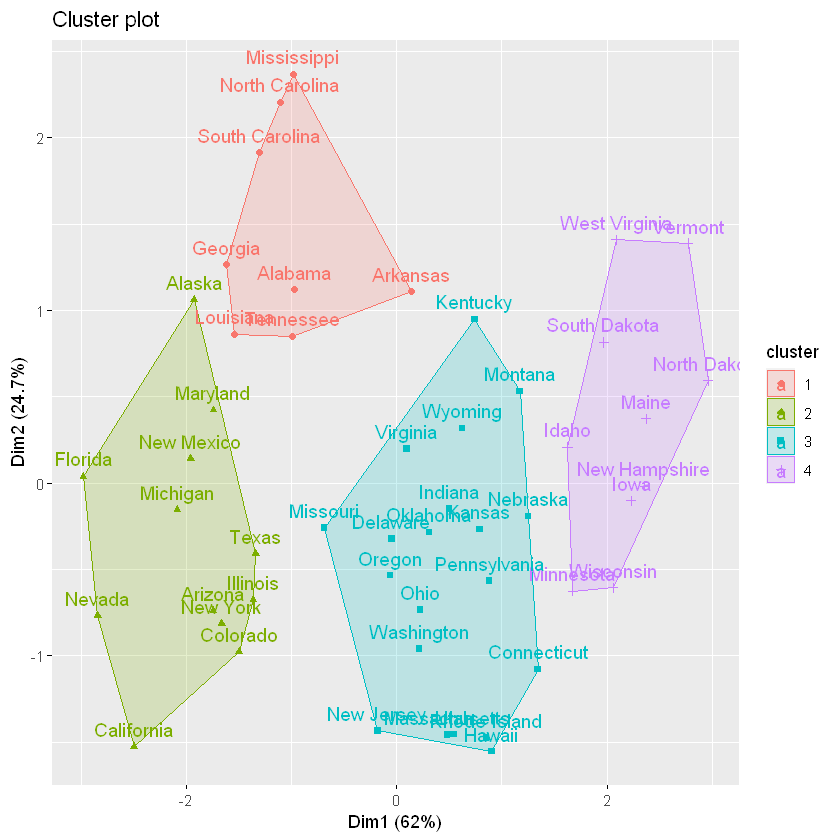

In [7]:
# Now let's plot the results
fviz_cluster(kmed, data = data)

In [8]:
# Add cluster assignment to original data
final_data <- cbind(USArrests, cluster = kmed$cluster)
head(final_data)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2


In [9]:
# Now let's check the aggregate for each cluster using median
aggregate(USArrests, by=list(cluster=kmed$cluster), median)

cluster,Murder,Assault,UrbanPop,Rape
1,13.8,242.5,54.0,21.7
2,11.2,259.0,80.0,32.0
3,6.0,132.5,71.0,18.4
4,2.4,64.5,52.5,11.0
